# Лабораторная работа №1

## Предметная область, источник и характер данных
В датасете содержится информация о различных параметрах, которые влияют на цену проживания в различных местах города Бостон. Данные реальны. Ссылка: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

## Описание атрибутов
Все атрибуты - числовые.
- CRIM: рейтинг преступности на душу населения
- ZN: доля жилой земли
- INDUS: доля гектаров, не связанных с розничной торговлей
- CHAS: наличие границы с рекой
- NOX: концентрация оксидов азота в воздухе
- RM: среднее количество комнат в жилом помещении
- AGE: доля квартир, занимаемых владельцами, построенных до 1940 года
- DIS: взвешенные расстояния до пяти Бостонских центров занятости
- RAD: показатель доступности к радиальным магистралям
- TAX: ставка налога на недвижимость по полной стоимости за 10 000 долларов
- PTRATIO: соотношение числа учеников и учителей
- B: доля чернокожих в местности
- LSTAT: более низкий статус населения
- MEDV: средняя стоимость домов, занимаемых владельцами, в 1000 долларов

## Анализ данных
Задача анализа - предсказание цены жилья в различных местах Бостона.
Проверим датасет на пустые значения и выведем его:

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline

df = pd.read_csv("./data.csv")
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
df = df.dropna()

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Нахождение СКО и среднего значения атрибутов

In [23]:
for column in df.columns:
    std_dev = np.std(df[column])
    mean_value = np.mean(df[column])
    print(f"\033[1m{column}")
    print(f"\033[0mСКО = {std_dev}")
    print(f"\033[0mСреднее = {mean_value}")
    print("\n")

CRIM
СКО = 8.591620944016817
Среднее = 3.6174040177865616


ZN
СКО = 23.30228976883345
Среднее = 11.289525691699605


INDUS
СКО = 6.8178448192193235
Среднее = 11.174841897233202


CHAS
СКО = 0.25374293496034855
Среднее = 0.0691699604743083


NOX
СКО = 0.11549685595347947
Среднее = 0.5552088932806324


RM
СКО = 0.7031058462449036
Среднее = 6.287588932806324


AGE
СКО = 28.13373161357795
Среднее = 68.55573122529644


DIS
СКО = 2.0940751021953563
Среднее = 3.7752308300395256


RAD
СКО = 8.708043856606919
Среднее = 9.531620553359684


TAX
СКО = 168.21621628647335
Среднее = 408.3300395256917


PTRATIO
СКО = 2.1999006154239886
Среднее = 18.49841897233202


B
СКО = 91.16324596439675
Среднее = 356.2283794466403


LSTAT
СКО = 7.815792953138036
Среднее = 12.872569169960475


MEDV
СКО = 9.511107387817608
Среднее = 22.71185770750988




## Построение гистограмм, определение выбросов

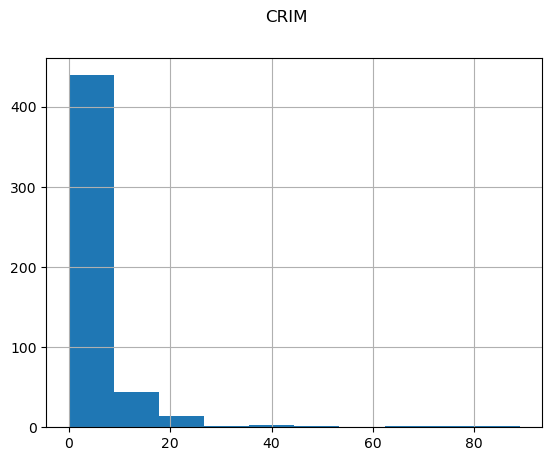

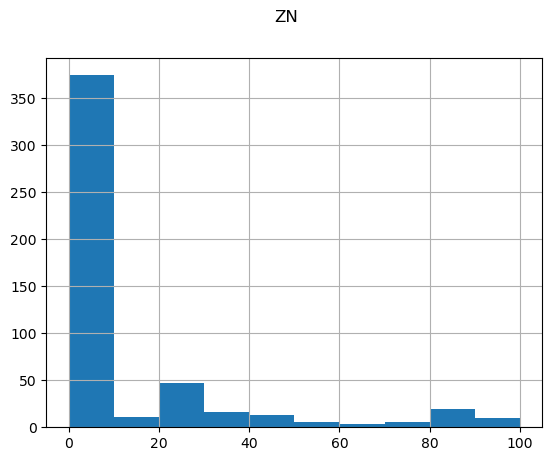

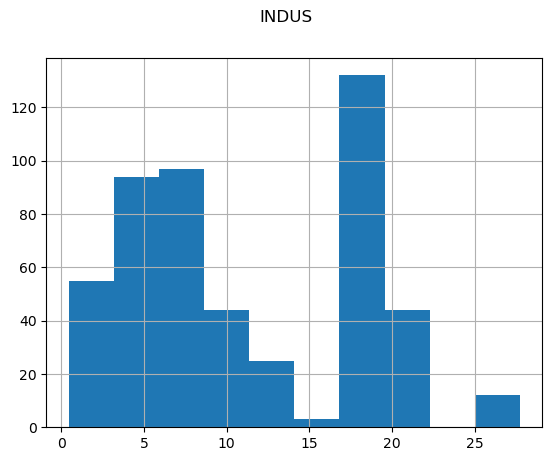

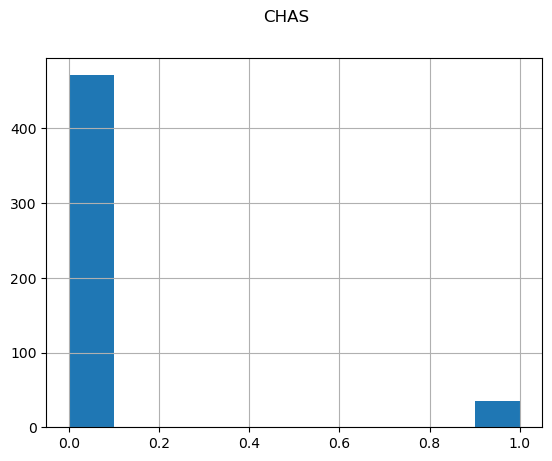

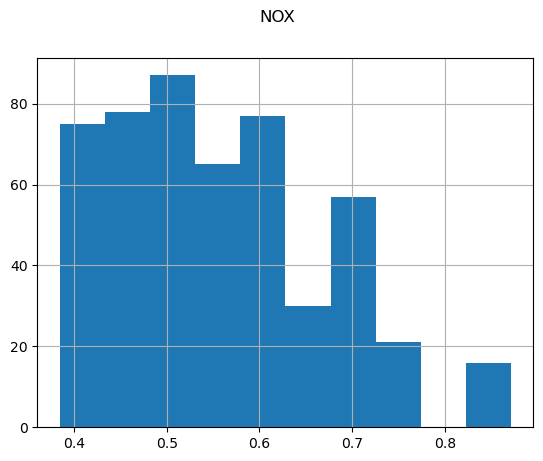

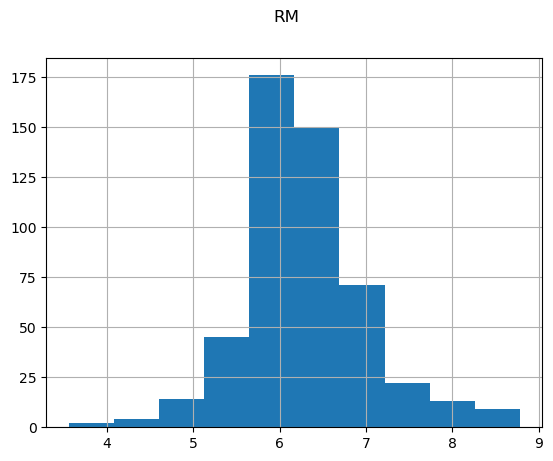

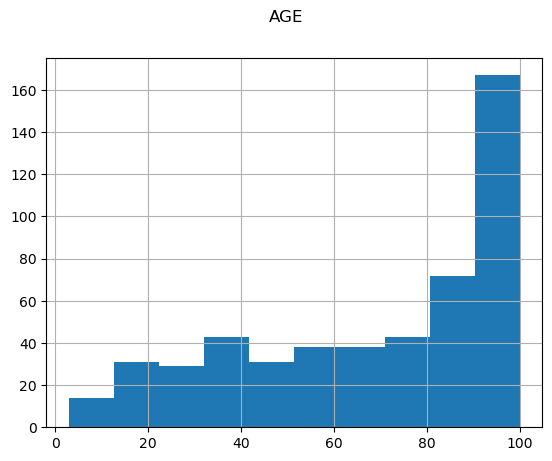

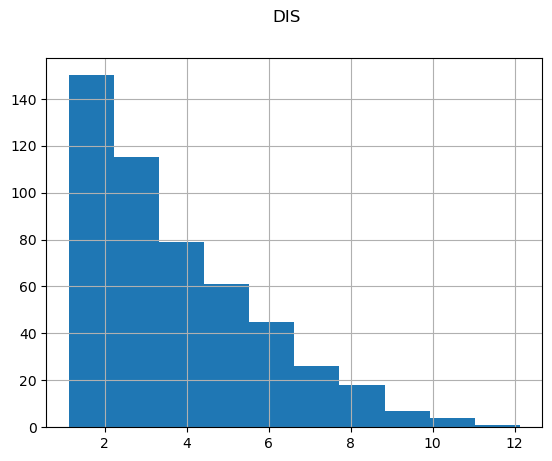

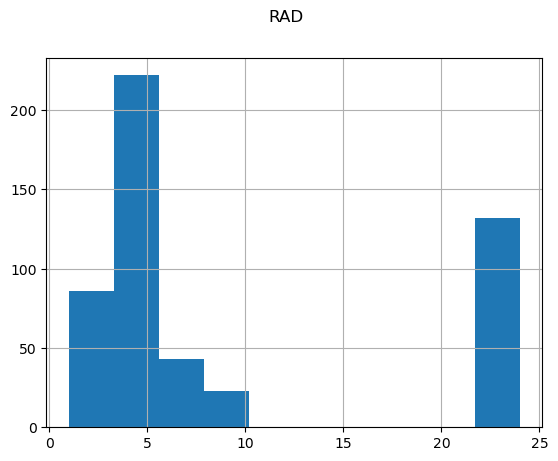

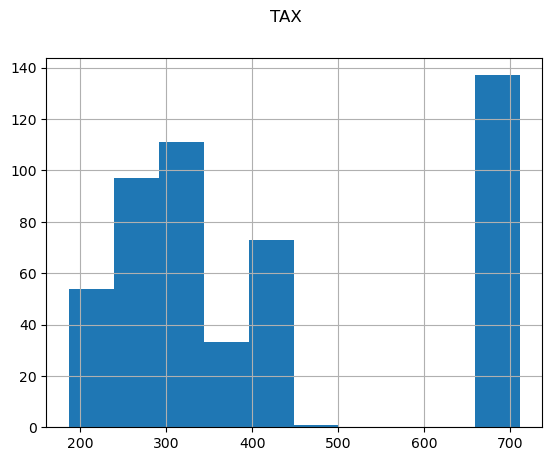

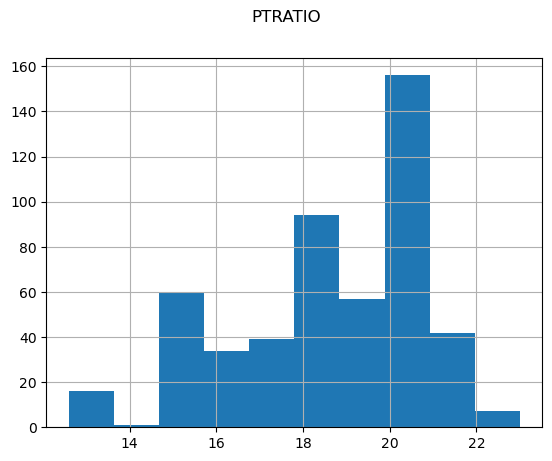

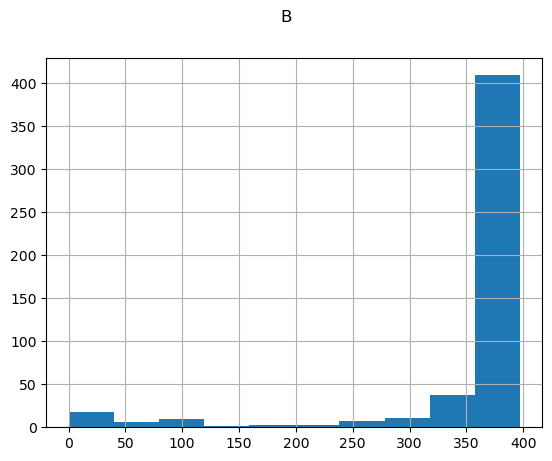

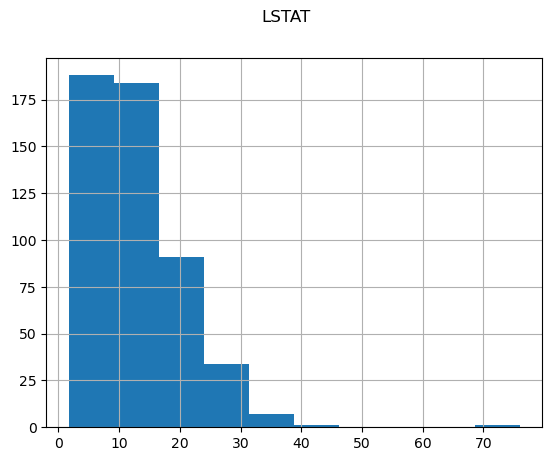

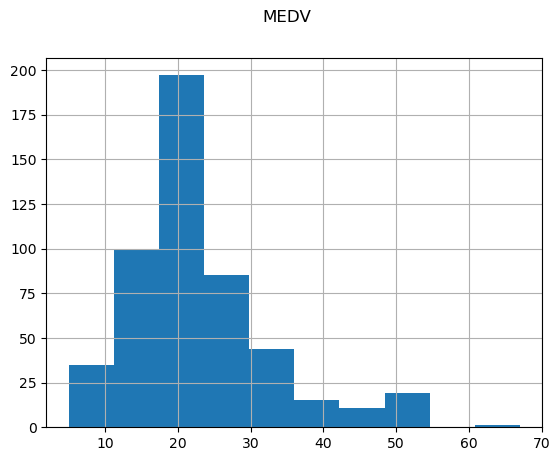

In [28]:
for column in df.columns:
    fig = plt.figure()
    fig.suptitle(df[column].name)
    df[column].hist()

Далее напишем код для определения выбросов:

In [33]:
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
    print(f"{column} - {outliers_count} выбросов")

CRIM - 66 выбросов
ZN - 68 выбросов
INDUS - 0 выбросов
CHAS - 35 выбросов
NOX - 0 выбросов
RM - 30 выбросов
AGE - 0 выбросов
DIS - 5 выбросов
RAD - 0 выбросов
TAX - 0 выбросов
PTRATIO - 15 выбросов
B - 76 выбросов
LSTAT - 8 выбросов
MEDV - 39 выбросов


Следовательно, датасет имеет выбросы.
## Определение корреляции
Для начала построим матрицу графиков рассеяния:

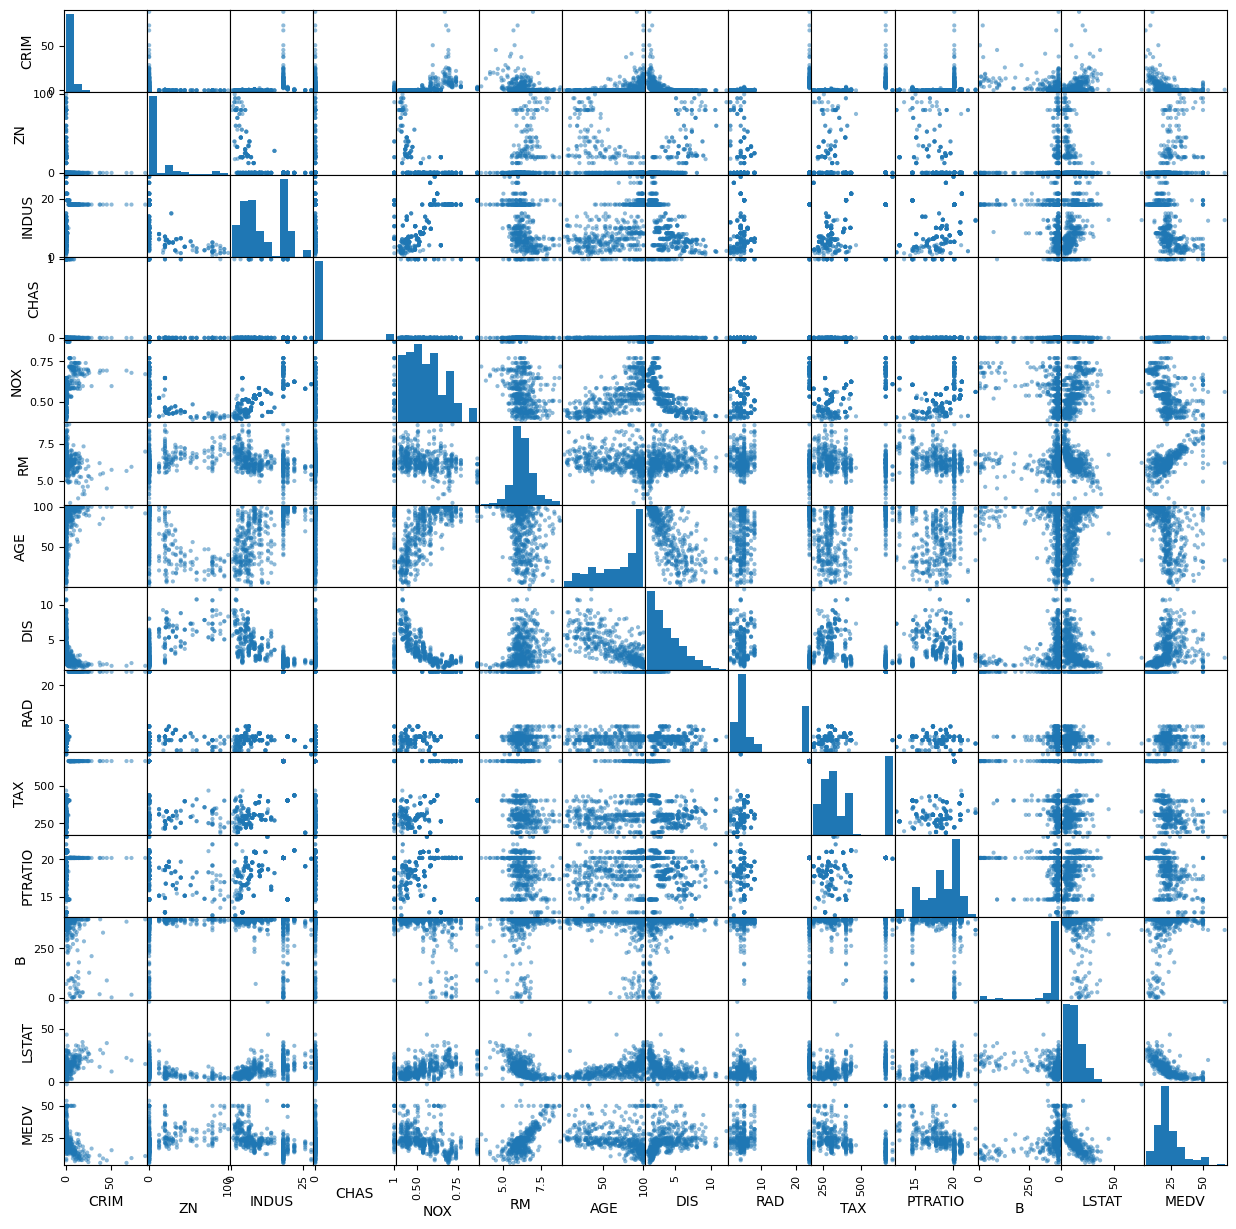

In [36]:
frame = pd.DataFrame(df)
scatter_matrix = pd.plotting.scatter_matrix(frame, figsize=(15, 15))

Теперь построим матрицу корреляций:

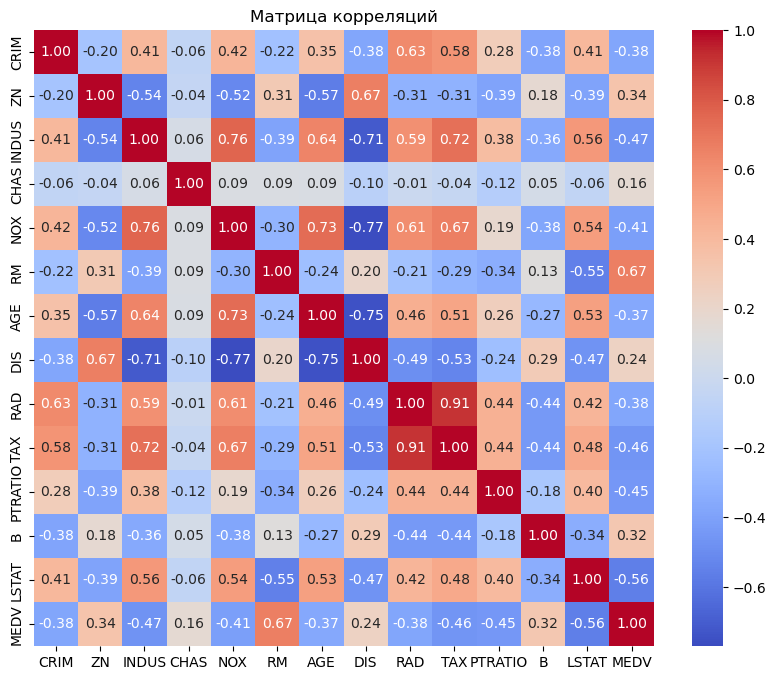

In [39]:
frame = pd.DataFrame(df)
matrix = frame.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, xticklabels=matrix.columns, yticklabels=matrix.columns)
plt.title('Матрица корреляций')
plt.show()

## Анализ полученных данных
Высокая корреляция (0.6 < abs(corr) < 1) присутствует между расстоянием до центров занятости и долей квартир (обратная корреляция, построенных до 1940 года (вполне логично, может раньше при градостроительстве это было спланировано). Также между расстоянием до центров занятости и концентрацией оксидов азота (обратная корреляция), также высокая обратная корреляция между расстоянием до центров занятости и долей гектаров, не связанных с розничной торговлей (тоже вполне логично.). Высокая прямая корреляция есть между долей квартир, построенных до 1940 года и концентрацией оксидов в воздухе (может, на это влияет качество материалов), также между ставкой налога и долей гектаров, не связанных с торговлей. Между некоторыми другими элементами тоже есть высокая корреляция. Самая высокая прямая корреляция (0.91) есть между показателем доступности к магистралям и ставкой налога на недвижимость (это вполне разумно).

Средняя корреляция (0.3 < abs(corr) < 0.6) есть между многими атрибутами, например, обратная корреляция есть между долей чернокожих в местности и ставкой налога, а прямая корреляция есть между низким статусом населения и долей гектаров, не связанной с розничной торговлей.

Низкая корреляция (0.1 < abs(corr) < 0.3) есть, например, между соотношением числа учеников и учителей в районе и рейтингом преступности на душу населения (прямая корреляция).

Также есть элементы без корреляции между друг другом (abs(corr) < 0.1), например, между наличием границы с рекой и показателем доступности к магистралям, что логично, ведь в реальности это никак не влияет друг на друга.